Import dependencies and doing some preprocessing

In [66]:
import pandas as pd
import numpy as np

In [67]:
data=pd.read_csv("flipkart_product.csv",encoding='latin-1')  # dataset is not udf-8 so using encoding latin-1

In [68]:
data.head()

ProductName     Price Rate  \
0  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
1  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
2  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
3  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    1   
4  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   

            Review                                            Summary  
0           Super!  Great cooler.. excellent air flow and for this...  
1          Awesome             Best budget 2 fit cooler. Nice cooling  
2             Fair  The quality is good but the power of air is de...  
3  Useless product                 Very bad product it's a only a fan  
4             Fair                                      Ok ok product

Checking null values

In [69]:
data.isnull().sum()

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

Price only have 1 null value so we will remove it
Rate also have 1 null value so remove it
for review and summary we will fill null values as no review and no summary accordingly.

Filling null values of review and summary column

In [70]:
data['Review'] = data['Review'].fillna('No review')
data['Summary'] = data['Summary'].fillna('No summary')

In [71]:
data.isnull().sum()

ProductName    0
Price          1
Rate           1
Review         0
Summary        0
dtype: int64

In [72]:
df=data.dropna()

In [73]:
df.isnull().sum()

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

Get summary of our dataset

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189873 entries, 0 to 189872
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189873 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189873 non-null  object
 4   Summary      189873 non-null  object
dtypes: object(5)
memory usage: 8.7+ MB


In [75]:
df.shape

(189873, 5)

Dropping duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [77]:
df.shape

(165012, 5)

In [ ]:
import nltk
nltk.download('stopwords')

Removing stop words from textual data is a common preprocessing step in Natural Language Processing (NLP). Stop words are common words that do not carry significant meaning and are usually removed to focus on the important words in the text. 

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

A function to remove stop words from each row of summary column

In [80]:
def remove_stop_words(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [ ]:
df['Summary'] = df['Summary'].astype(str).apply(remove_stop_words)

In [82]:
df.head(10)

ProductName     Price Rate  \
0  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
1  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
2  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
3  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    1   
4  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
5  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
6  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
7  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
8  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    1   
9  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    4   

               Review                                            Summary  
0              Super!  great cooler excellent air flow price amazing ...  
1             Awesome                best budget fit cooler nice cooling  
2                Fair                      quality good power air decent  
3     Useless product                                    bad product fan  
4                Fair                                      ok ok product  
5             Awesome  cooler really fantastic provides good air flow...  
6  Highly recommended                                       good product  
7                Nice                                               nice  
8      Unsatisfactory                                         bad cooler  
9     Worth the money                                               good

Saving the clean dataset without stop words in summary column

In [84]:
df.to_csv("flipkart_product_cleaned_stopwords.csv", index=False)

In [ ]:
pip install wordcloud matplotlib

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Join the data of summary column to a list so that we can make a wordcloud chart

In [87]:
text = " ".join(df['Summary'].tolist())

In [88]:
r=df['Summary'].tolist()
print(r[0:5])

['great cooler excellent air flow price amazing unbelievablejust love', 'best budget fit cooler nice cooling', 'quality good power air decent', 'bad product fan', 'ok ok product']


In [89]:
r=text.split(",")
r[0:10]

['great cooler excellent air flow price amazing unbelievablejust love best budget fit cooler nice cooling quality good power air decent bad product fan ok ok product cooler really fantastic provides good air flow highly recommended good product nice bad cooler good beautiful product good material perfectly working awesome good wonderful product must buy nice air cooler smart cool breeze producer awsm nice product great cooler nice product good nice product good product nice product reasonable price like goodd good product good product kawaleti good cooler amazing beautiful designs affordable price using since months great experience good performance nice look product good strong thrust air flow must buy good bad quality nice product soundless product low price company nice best poduct bought flifkart works superb like ac price also reasonable rs cooler big wide maharaja brand trust every thing good cooler create less noise thing motor powerful even high speed rest things good yes one m

In [90]:
p=[s.split(" ") for s in r]
p[0:10]

[['great',
  'cooler',
  'excellent',
  'air',
  'flow',
  'price',
  'amazing',
  'unbelievablejust',
  'love',
  'best',
  'budget',
  'fit',
  'cooler',
  'nice',
  'cooling',
  'quality',
  'good',
  'power',
  'air',
  'decent',
  'bad',
  'product',
  'fan',
  'ok',
  'ok',
  'product',
  'cooler',
  'really',
  'fantastic',
  'provides',
  'good',
  'air',
  'flow',
  'highly',
  'recommended',
  'good',
  'product',
  'nice',
  'bad',
  'cooler',
  'good',
  'beautiful',
  'product',
  'good',
  'material',
  'perfectly',
  'working',
  'awesome',
  'good',
  'wonderful',
  'product',
  'must',
  'buy',
  'nice',
  'air',
  'cooler',
  'smart',
  'cool',
  'breeze',
  'producer',
  'awsm',
  'nice',
  'product',
  'great',
  'cooler',
  'nice',
  'product',
  'good',
  'nice',
  'product',
  'good',
  'product',
  'nice',
  'product',
  'reasonable',
  'price',
  'like',
  'goodd',
  'good',
  'product',
  'good',
  'product',
  'kawaleti',
  'good',
  'cooler',
  'amazing',
  

In [91]:
all_words = [word for sublist in p for word in sublist]
all_words

['great',
 'cooler',
 'excellent',
 'air',
 'flow',
 'price',
 'amazing',
 'unbelievablejust',
 'love',
 'best',
 'budget',
 'fit',
 'cooler',
 'nice',
 'cooling',
 'quality',
 'good',
 'power',
 'air',
 'decent',
 'bad',
 'product',
 'fan',
 'ok',
 'ok',
 'product',
 'cooler',
 'really',
 'fantastic',
 'provides',
 'good',
 'air',
 'flow',
 'highly',
 'recommended',
 'good',
 'product',
 'nice',
 'bad',
 'cooler',
 'good',
 'beautiful',
 'product',
 'good',
 'material',
 'perfectly',
 'working',
 'awesome',
 'good',
 'wonderful',
 'product',
 'must',
 'buy',
 'nice',
 'air',
 'cooler',
 'smart',
 'cool',
 'breeze',
 'producer',
 'awsm',
 'nice',
 'product',
 'great',
 'cooler',
 'nice',
 'product',
 'good',
 'nice',
 'product',
 'good',
 'product',
 'nice',
 'product',
 'reasonable',
 'price',
 'like',
 'goodd',
 'good',
 'product',
 'good',
 'product',
 'kawaleti',
 'good',
 'cooler',
 'amazing',
 'beautiful',
 'designs',
 'affordable',
 'price',
 'using',
 'since',
 'months',
 'grea

In [92]:
text1 = ' '.join(all_words)

In [93]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

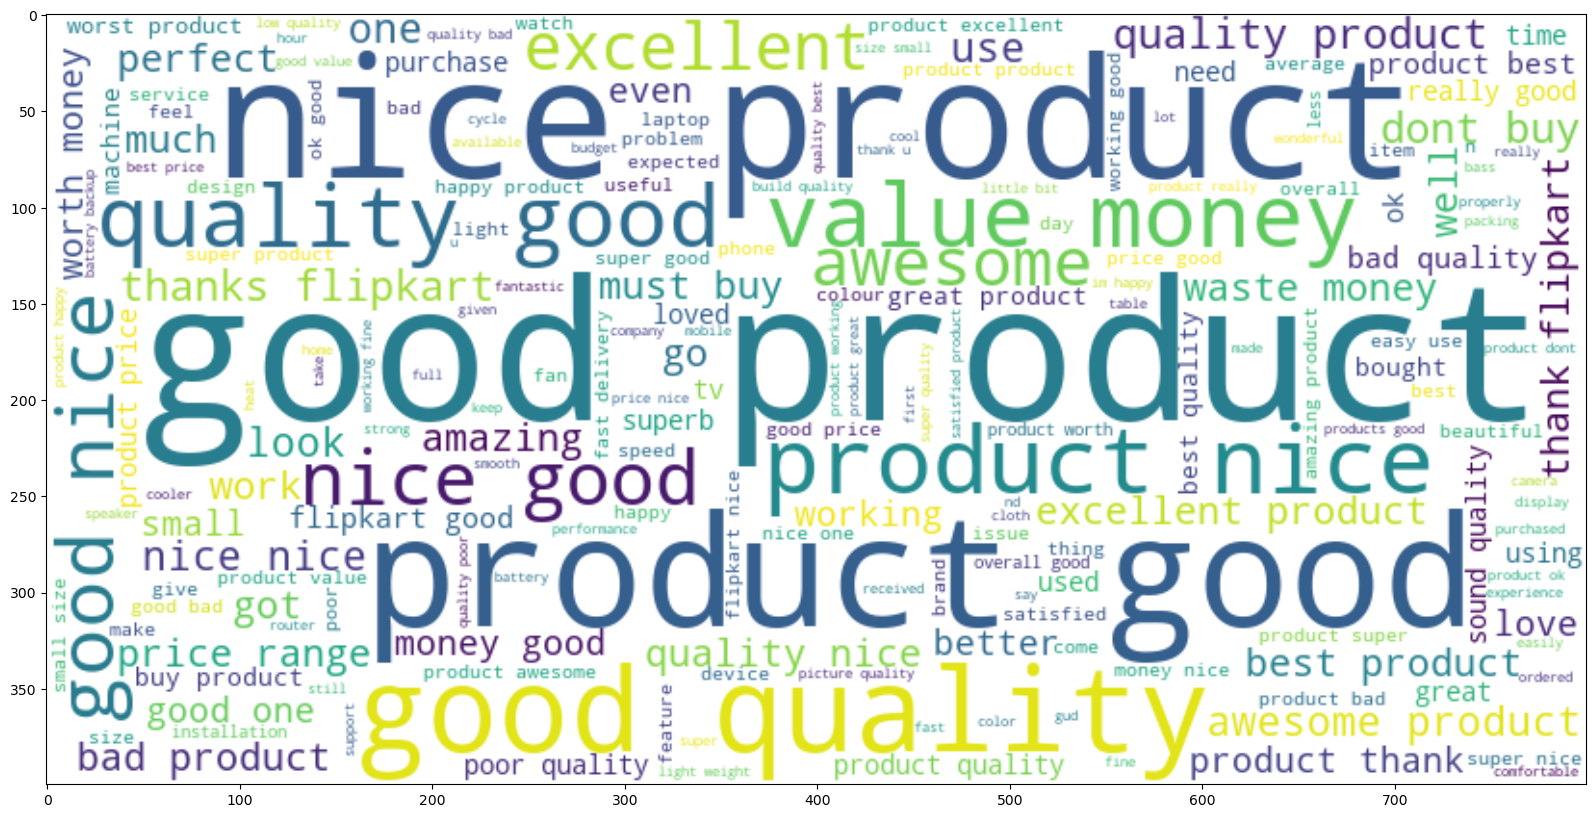

In [94]:
plt.figure(figsize=(30, 10))
plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
plt.show()

In [95]:
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(text1)

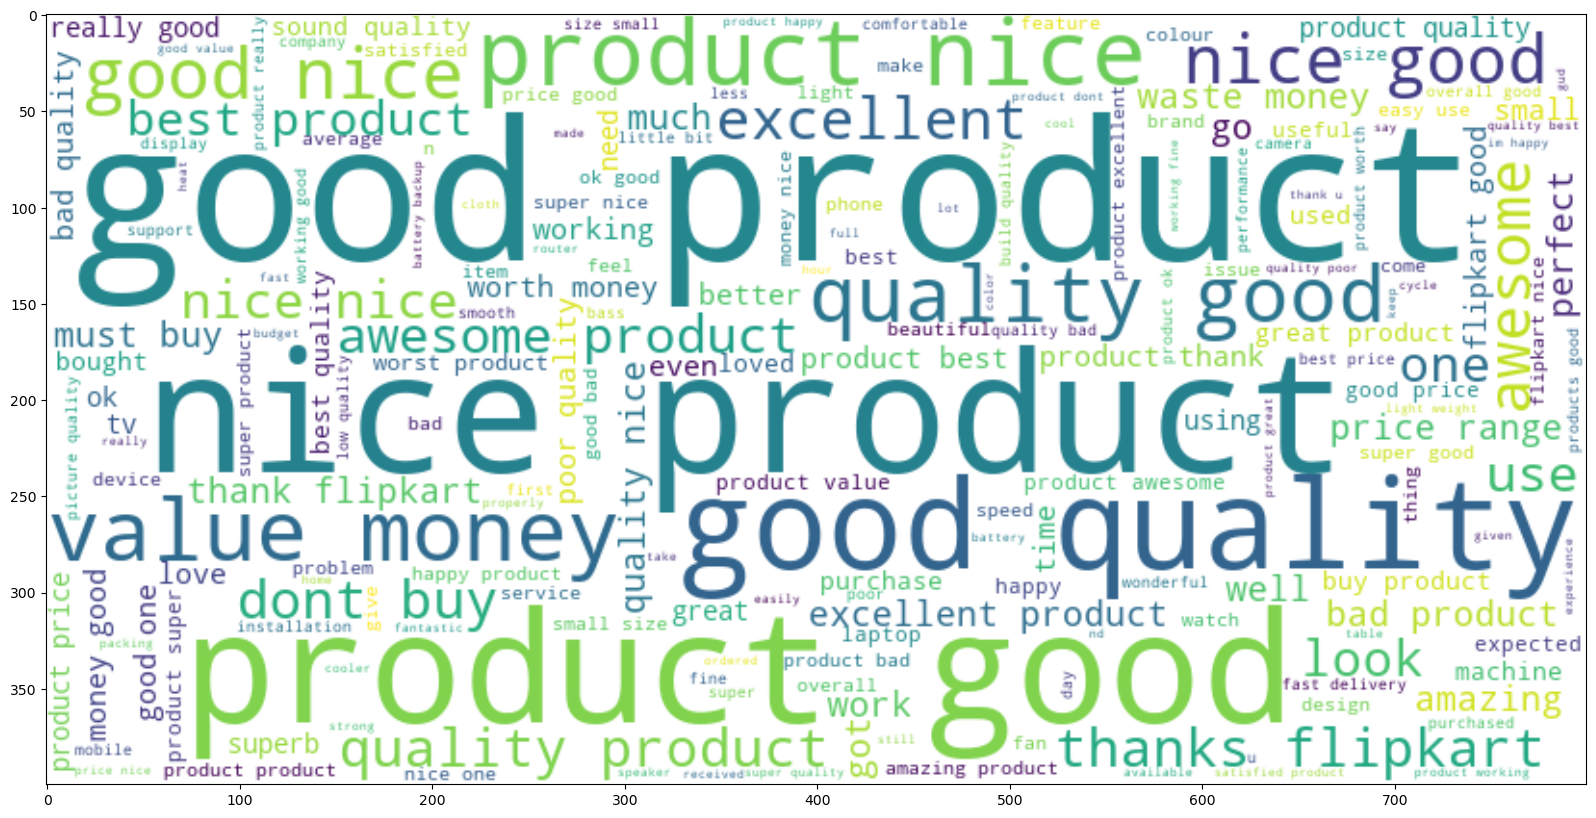

In [96]:
plt.figure(figsize=(30, 10))
plt.imshow(wordcloud1, interpolation='bilinear')
#plt.axis("off")
plt.show()

In [97]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [98]:
from textblob import TextBlob

Function to get sentiment of data i.e. i'm using summary column 

In [99]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df['sentiment'] = df['Summary'].apply(get_sentiment)

Grouping sentiment with Review and Price to get the sentiments as +ve or -ve

In [101]:
Review_sentiment = df.groupby('Review')['sentiment'].mean().reset_index()
print(Review_sentiment)

Price_sentiment = df.groupby('Price')['sentiment'].mean().reset_index()
print(Price_sentiment)

                                                Review  sentiment
0                            "Wise deal for the price"   0.444500
1     1) Product quality = 2 stars, Delivery = 5 stars   0.125000
2                     100% Satisfied from the Product.   0.436111
3                                       2 Thumbs up !!   0.550000
4                        2 weeks still no installation   0.500000
...                                                ...        ...
1260                                     worst product  -0.141667
1261             worst service from flipkart this time  -1.000000
1262                                      worth buying   0.000000
1263                                   worth for money   0.300000
1264                                     wrost product   0.105556

[1265 rows x 2 columns]
                                                 Price  sentiment
0                              Bajaj DX 2 L/W Dry Iron  -0.066667
1    Nova Plus Amaze NI 10 1100 W Dry Iron?ÿ?ÿ(Grey

In [102]:
import seaborn as sns

C:\Users\ritik\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 152 (\x98) missing from current font.

C:\Users\ritik\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 159 (\x9f) missing from current font.

C:\Users\ritik\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 145 (\x91) missing from current font.

C:\Users\ritik\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 140 (\x8c) missing from current font.



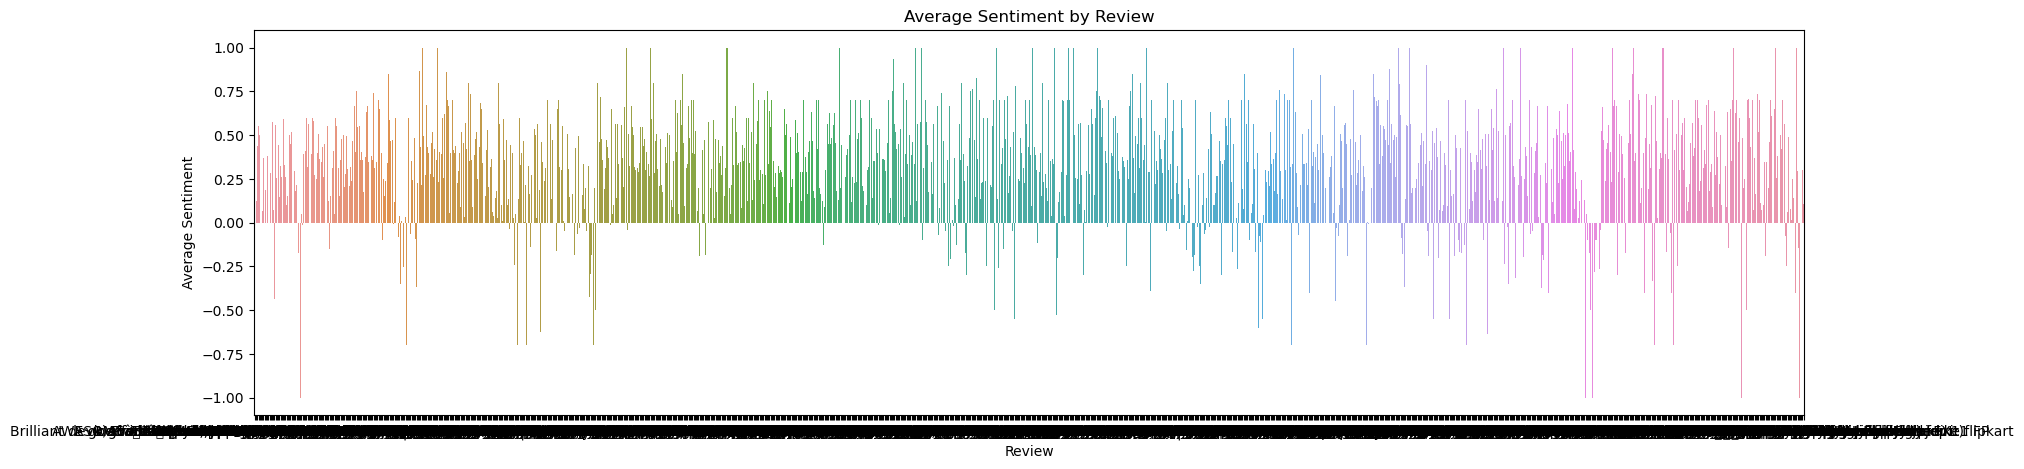

In [103]:
plt.figure(figsize=(20, 5))
sns.barplot(x='Review', y='sentiment', data=Review_sentiment)
plt.title('Average Sentiment by Review')
plt.xlabel('Review')
plt.ylabel('Average Sentiment')
plt.show()

C:\Users\ritik\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 131 (\x83) missing from current font.

C:\Users\ritik\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 130 (\x82) missing from current font.



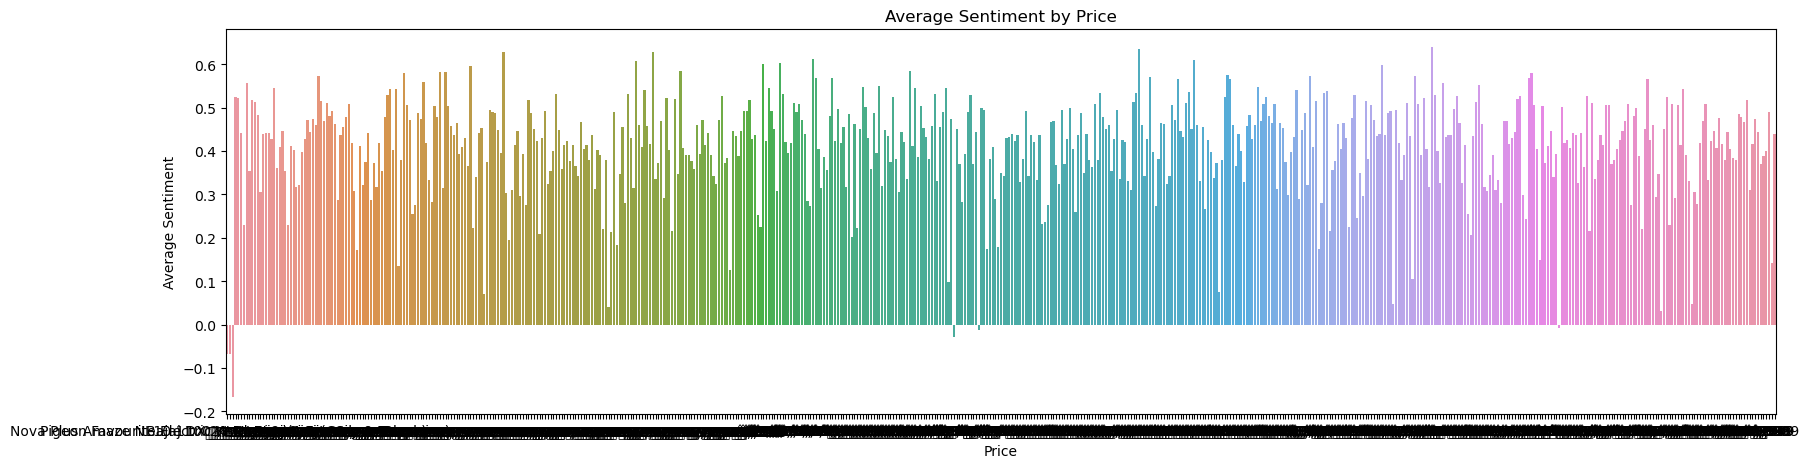

In [104]:
plt.figure(figsize=(20, 5))
sns.barplot(x='Price', y='sentiment', data=Price_sentiment)
plt.title('Average Sentiment by Price')
plt.xlabel('Price')
plt.ylabel('Average Sentiment')
plt.show()

In [105]:
df.dtypes

ProductName     object
Price           object
Rate            object
Review          object
Summary         object
sentiment      float64
dtype: object

In [106]:
df.nunique().sort_values(ascending=False)

Summary        79374
sentiment       5526
Review          1265
ProductName      811
Price            561
Rate               9
dtype: int64